## Styling plots for publication with matplotlib¶

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
from matplotlib import rc

# Set the global font to be DejaVu Sans, size 10 (or any other sans-serif font of your choice!)
rc('font',**{'family':'sans-serif','sans-serif':['DejaVu Sans'],'size':10})

# Set the font used for MathJax - more on this later
rc('mathtext',**{'default':'regular'})

In [3]:
%matplotlib inline

# The following %config line changes the inline figures to have a higher DPI.
# You can comment out (#) this line if you don't have a high-DPI (~220) display.
%config InlineBackend.figure_format = 'retina'

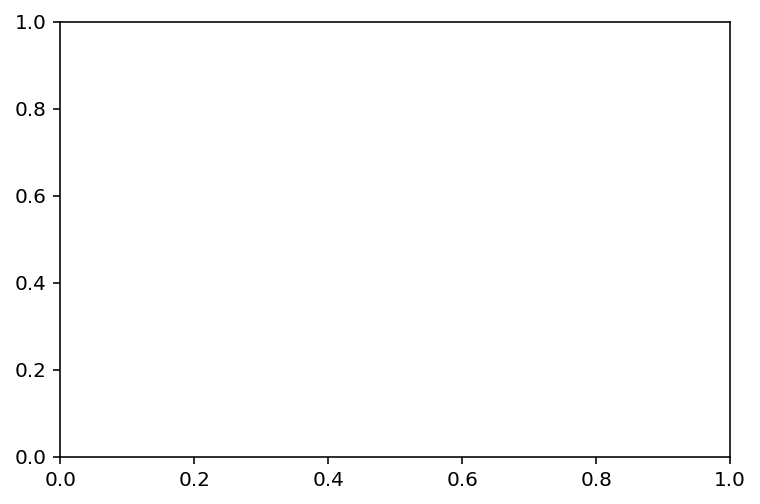

In [4]:
fig, ax = plt.subplots()

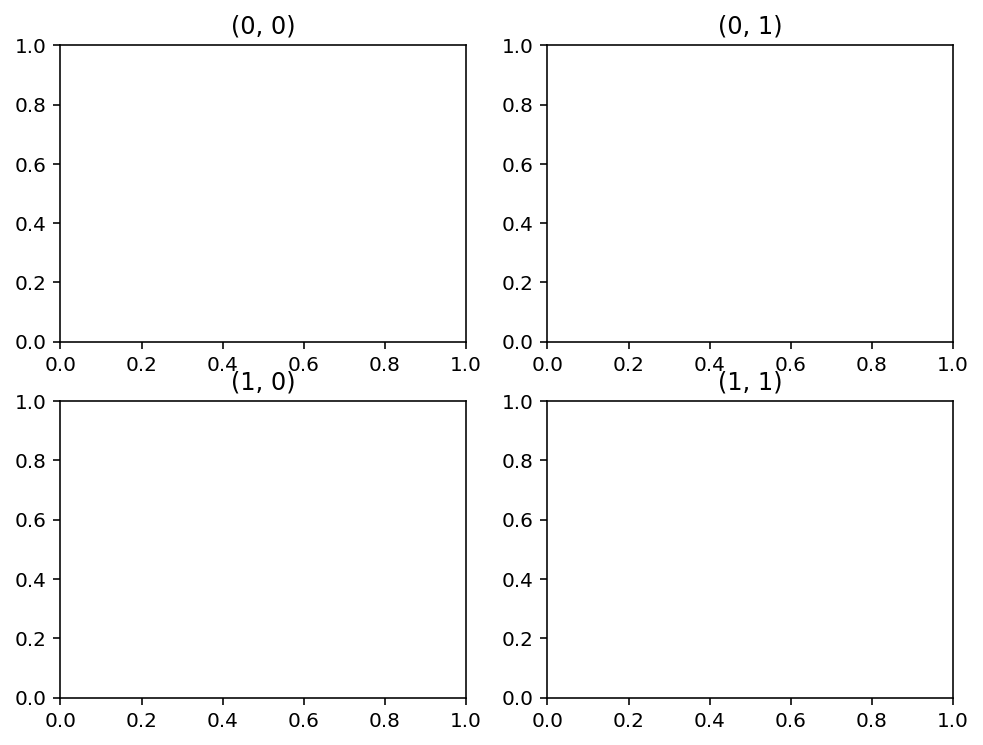

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

# Iterate through the 2x2 array and set titles of each
# subplot to their location in the figure object
for (n_row, n_col), axes in np.ndenumerate(ax):
    axes.set_title('(%d, %d)' % (n_row, n_col))

In [7]:
# Specify the mean and standard deviation for each mock data group
data_specs = [(2, 2), (7, 1), (4, 2.5), (10, 0.5), (5.5, 0.1)]

# Generate data and place into a pandas DataFrame
data = [np.random.normal(mu, sigma, 10) for mu, sigma in data_specs]
data = pd.DataFrame(data).T
data.columns = ['Group_%s' % n for n in range(1,6)]

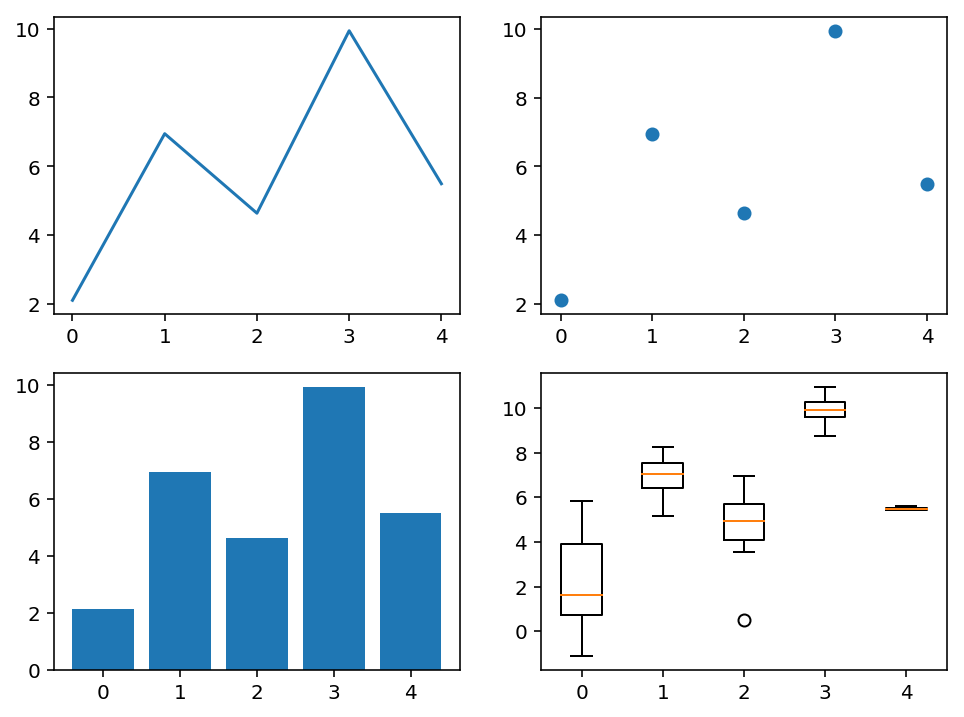

In [8]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

# Get the means of each group
means = data.mean()

# Generate some mock x coordinates
x = np.arange(len(means))

# Makes a line plot of the means of each group
ax[0][0].plot(x, means)

# Makes a scatter plot of the means of each group
ax[0][1].scatter(x, means)

# Makes a bar plot of the means of each group
ax[1][0].bar(x, means)

# Makes a boxplot of the data values in each group
ax[1][1].boxplot(data.values, positions=x);

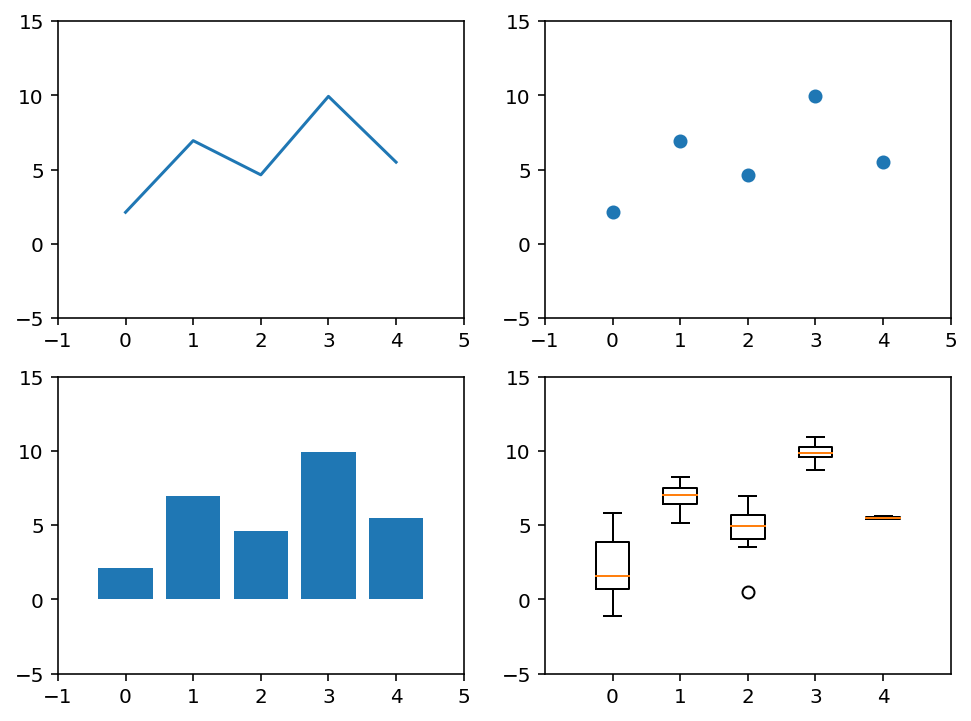

In [10]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

means = data.mean()
x = np.arange(len(means))

ax[0][0].plot(x, means)
ax[0][1].scatter(x, means)
ax[1][0].bar(x, means)
ax[1][1].boxplot(data.values, positions=x)

# x-y Skalen
for axes in ax.flat:
    axes.set_xlim(-1, 5)
    axes.set_ylim(-5, 15)

(-5, 15)

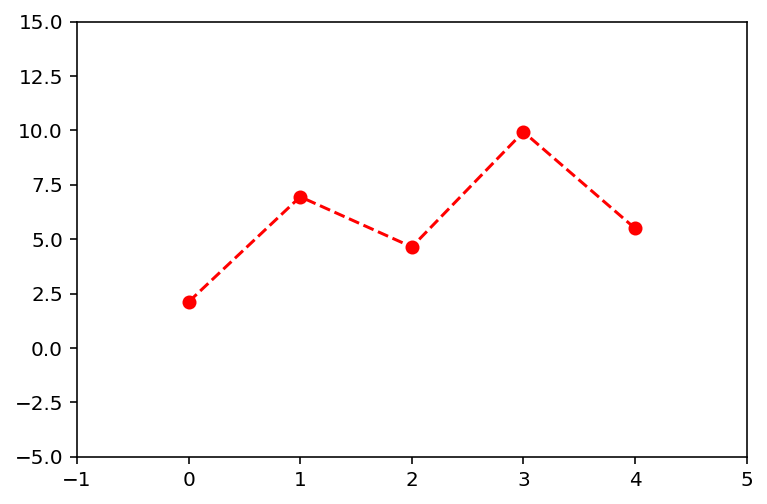

In [12]:
fig, ax = plt.subplots()

ax.plot(x, means, color='red', ls='--', marker='o')

# Define variables for limits
xlims = (-1, 5)
ylims = (-5, 15)
ax.set_xlim(xlims)
ax.set_ylim(ylims)

(-5, 15)

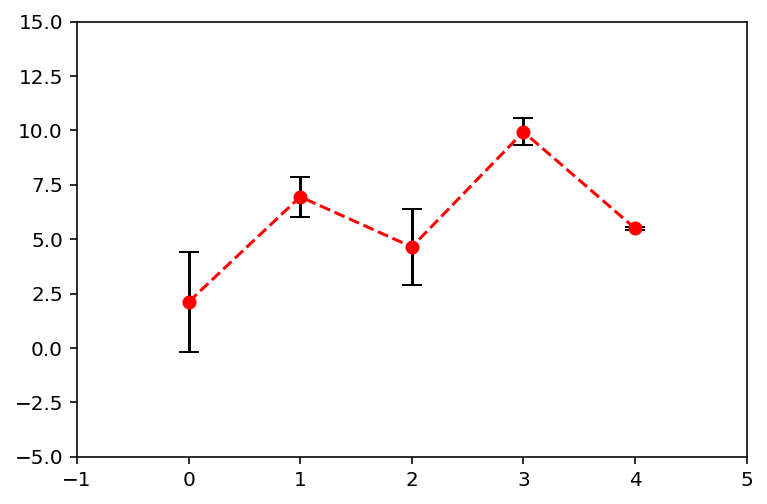

In [13]:

fig, ax = plt.subplots()

stdev = data.std()

ax.errorbar(x, means, yerr=stdev, color='red', ls='--', marker='o', capsize=5, capthick=1, ecolor='black')

ax.set_xlim(xlims)
ax.set_ylim(ylims)

In [15]:
def custom_lineplot(ax, x, y, error, xlims, ylims, color='red'):
    """Customized line plot with error bars."""
    
    ax.errorbar(x, y, yerr=error, color=color, ls='--', marker='o', capsize=5, capthick=1, ecolor='black')
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax
    
def custom_scatterplot(ax, x, y, error, xlims, ylims, color='green', markerscale=100):
    """Customized scatter plot where marker size is proportional to error measure."""
    
    markersize = error * markerscale
    
    ax.scatter(x, y, color=color, marker='o', s=markersize, alpha=0.5)
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax
    
def custom_barchart(ax, x, y, error, xlims, ylims, error_kw, color='lightblue', width=0.75):
    """Customized bar chart with positive error bars only."""
    
    error = [np.zeros(len(error)), error]
    
    ax.bar(x, y, color=color, width=width, yerr=error, error_kw=error_kw, align='center')
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax
    
def custom_boxplot(ax, x, y, error, xlims, ylims, mediancolor='magenta'):
    """Customized boxplot with solid black lines for box, whiskers, caps, and outliers."""
    
    medianprops = {'color': mediancolor, 'linewidth': 2}
    boxprops = {'color': 'black', 'linestyle': '-'}
    whiskerprops = {'color': 'black', 'linestyle': '-'}
    capprops = {'color': 'black', 'linestyle': '-'}
    flierprops = {'color': 'black', 'marker': 'x'}
    
    ax.boxplot(y,
               positions=x,
               medianprops=medianprops,
               boxprops=boxprops,
               whiskerprops=whiskerprops,
               capprops=capprops,
               flierprops=flierprops)
    
    ax.set_xlim(xlims)
    ax.set_ylim(ylims)
    
    return ax

In [19]:
def stylize_axes(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)

error_kw = {'capsize': 5, 'capthick': 1, 'ecolor': 'black'}

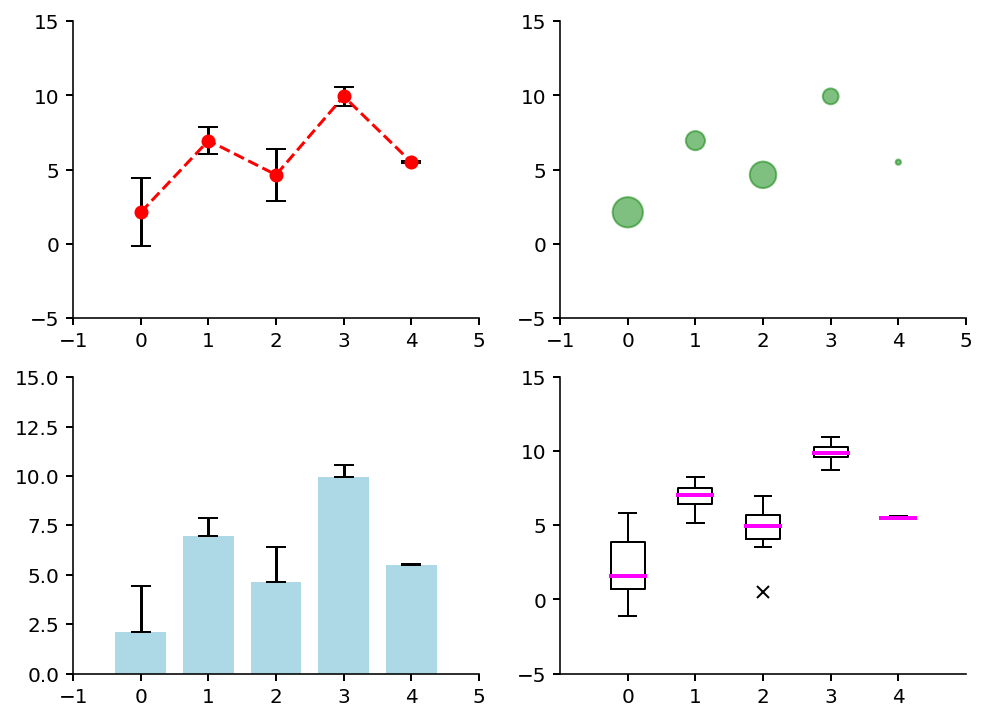

In [20]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

y = data.mean()
y_all = data.values
x = np.arange(len(means))
error = data.std()

xlims = (-1, 5)
ylims = (-5, 15)
bar_ylims = (0, 15)

custom_lineplot(ax[0][0], x, y, error, xlims, ylims)
custom_scatterplot(ax[0][1], x, y, error, xlims, ylims)
custom_barchart(ax[1][0], x, y, error, xlims, bar_ylims, error_kw)
custom_boxplot(ax[1][1], x, y_all, error, xlims, ylims)

for axes in ax.flat:
    stylize_axes(axes)

In [22]:
def stylize_axes(ax, title, xlabel, ylabel, xticks, yticks, xticklabels, yticklabels):
    """Customize axes spines, title, labels, ticks, and ticklabels."""
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    ax.xaxis.set_tick_params(top='off', direction='out', width=1)
    ax.yaxis.set_tick_params(right='off', direction='out', width=1)
    
    ax.set_title(title)
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)
    
    ax.set_xticklabels(xticklabels)
    ax.set_yticklabels(yticklabels)

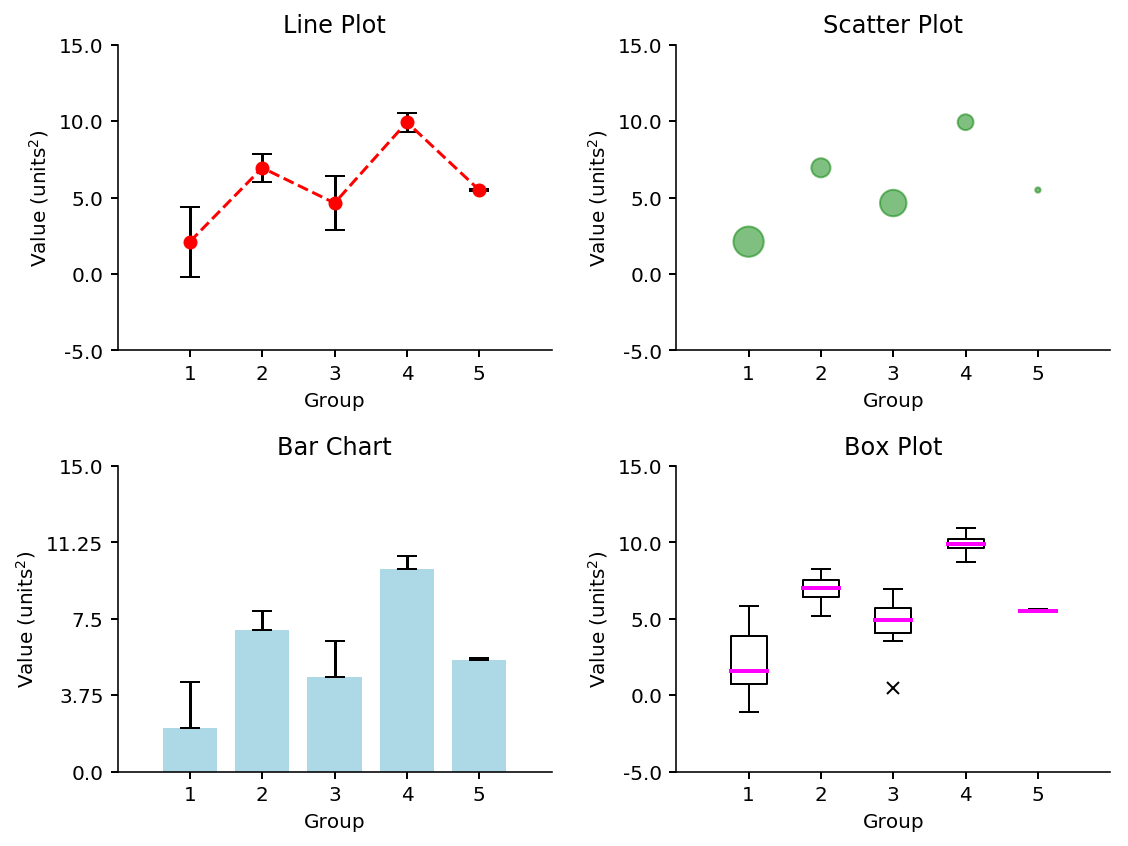

In [23]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(8,6))

y = data.mean()
y_all = data.values
x = np.arange(len(means))
error = data.std()

xlims = (-1, 5)
ylims = (-5, 15)
bar_ylims = (0, 15)

custom_lineplot(ax[0][0], x, y, error, xlims, ylims)
custom_scatterplot(ax[0][1], x, y, error, xlims, ylims)
custom_barchart(ax[1][0], x, y, error, xlims, bar_ylims, error_kw)
custom_boxplot(ax[1][1], x, y_all, error, xlims, ylims)

titles = ['Line Plot', 'Scatter Plot', 'Bar Chart', 'Box Plot']
xlabel = 'Group'
ylabel = 'Value ($units^2$)'
xticks = x
xticklabels = range(1,6)

for i, axes in enumerate(ax.flat):
    # Customize y ticks on a per-axes basis
    yticks = np.linspace(axes.get_ylim()[0], axes.get_ylim()[1], 5)
    yticklabels = yticks
    stylize_axes(axes, titles[i], xlabel, ylabel, xticks, yticks, xticklabels, yticklabels)
    
fig.tight_layout()

Install lib

conda install brewer2mpl

Find the colors from the Website
[http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3](http://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3)

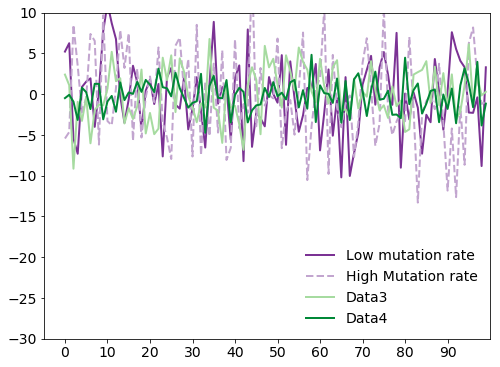

In [32]:
import glob
from pylab import *
import brewer2mpl

 # brewer2mpl.get_map args: set name  set type  number of colors
#bmap = brewer2mpl.get_map('Set1', 'qualitative', 7)
#bmap = brewer2mpl.get_map('PuRd', 'sequential', 7)
bmap = brewer2mpl.get_map('PRGn', 'Diverging', 4)
colors = bmap.mpl_colors
 
params = {
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'text.usetex': False,
    'figure.figsize': [8, 6]
}
rcParams.update(params)


def perc(data):
    median = np.zeros(len(data))
    perc_25 = np.zeros(len(data))
    perc_75 = np.zeros(len(data))
    for i in range(0, len(median)):
        median[i] = np.median(data[ i])
        perc_25[i] = np.percentile(data[ i], 25)
        perc_75[i] = np.percentile(data[ i], 75)
    return median, perc_25, perc_75

data_low_mut = np.random.randn(100)*5
data_high_mut = np.random.randn(100)*5
data3=np.random.randn(100)*3
data4=np.random.randn(100)*2

n_generations = data_low_mut
x = np.arange(0, len(n_generations))

med_low_mut, perc_25_low_mut, perc_75_low_mut = perc(data_low_mut)
med_high_mut, perc_25_high_mut, perc_75_high_mut = perc(data_high_mut)

fig = figure() # no frame
ax = fig.add_subplot(111)

# now all plot function should be applied to ax
ax.fill_between(x, perc_25_low_mut, perc_75_low_mut, alpha=0.25, linewidth=0, color=colors[0]) 
ax.fill_between(x, perc_25_high_mut, perc_75_high_mut, alpha=0.25, linewidth=0, color=colors[1])
ax.plot(x, med_low_mut, linewidth=2, color=colors[0])
ax.plot(x, med_high_mut, linewidth=2, linestyle='--', color=colors[1])
ax.plot(x, data3, linewidth=2, color=colors[2])
ax.plot(x, data4, linewidth=2, color=colors[3])

# change xlim to set_xlim
ax.set_xlim(-5, 100)
ax.set_ylim(-30, 10)

#change xticks to set_xticks
ax.set_xticks(np.arange(0, 100, 10))

legend = ax.legend(["Low mutation rate", "High Mutation rate","Data3","Data4"], loc=4);
frame = legend.get_frame()
frame.set_facecolor('1.0')
frame.set_edgecolor('1.0')

#fig.savefig('variance_matplotlib.png')

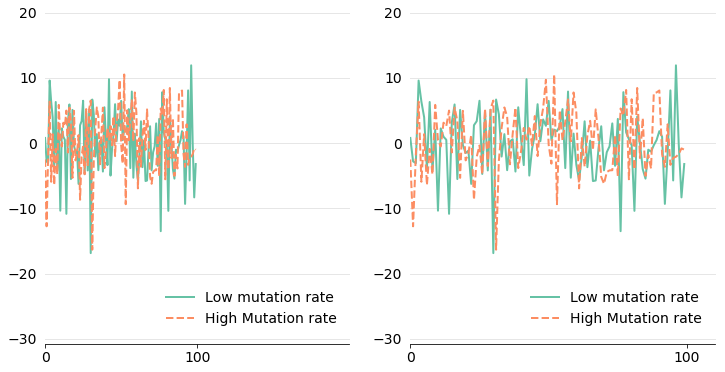

In [21]:
import glob
from pylab import *
import brewer2mpl

 # brewer2mpl.get_map args: set name  set type  number of colors
bmap = brewer2mpl.get_map('Set2', 'qualitative', 7)
colors = bmap.mpl_colors
 

params = {
    'axes.labelsize': 12,
    'font.size': 12,
    'legend.fontsize': 14,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'text.usetex': False,
    'figure.figsize': [12, 6]
}
rcParams.update(params)


def plot_data(ax, min_gen, max_gen):
    # now all plot function should be applied to ax
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.tick_params(axis='x', direction='out')
    ax.tick_params(axis='y', length=0)
    # offset the spines
    for spine in ax.spines.values():
            spine.set_position(('outward', 5))
    ax.grid(axis='y', color="0.9", linestyle='-', linewidth=1)
    # put the grid behind
    ax.set_axisbelow(True)

    ax.fill_between(x, perc_25_low_mut, perc_75_low_mut, alpha=0.25, linewidth=0, color=colors[0]) 
    ax.fill_between(x, perc_25_high_mut, perc_75_high_mut, alpha=0.25, linewidth=0, color=colors[1])


    ax.plot(x, med_low_mut, linewidth=2, color=colors[0])
    ax.plot(x, med_high_mut, linewidth=2, linestyle='--', color=colors[1])

    # change xlim to set_xlim
    ax.set_xlim(min_gen, max_gen)
    ax.set_ylim(-30, 20)

    #change xticks to set_xticks
    ax.set_xticks(np.arange(min_gen, max_gen, 100))

    legend = ax.legend(["Low mutation rate", "High Mutation rate"], loc=4);
    frame = legend.get_frame()
    frame.set_facecolor('1.0')
    frame.set_edgecolor('1.0')

med_low_mut, perc_25_low_mut, perc_75_low_mut = perc(data_low_mut)
med_high_mut, perc_25_high_mut, perc_75_high_mut = perc(data_high_mut)

fig = figure()
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
plot_data(ax1, 0, 200)
plot_data(ax2, 0, 110)

#fig.savefig('variance_subplot_bis.png')